In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('results.xlsx')
df = df.drop('Unnamed: 0',axis=1)
df.head()

,N_min,N_max,Déficit,Rendimiento,Potencia,Energia_firme,Energia_secundaria,Energia_falla,Energia_total,Tiempo_corrida
0,174.5,174.5,4.98,0.89,130,1082.111,2086.397,51.617,3220.125,1.26
1,174.5,174.5,4.60,0.90,130,1086.395,2121.444,47.890,3255.729,1.26
2,174.5,174.5,4.23,0.91,130,1090.572,2156.481,44.225,3291.278,1.23
3,174.5,174.5,3.84,0.92,130,1095.067,2191.519,40.193,3326.779,1.23
4,174.5,174.5,14.18,0.89,170,1278.008,1768.458,173.658,3220.124,1.25


In [4]:
ren_089 = df['Rendimiento'] == 0.89
ren_090 = df['Rendimiento'] == 0.90
ren_091 = df['Rendimiento'] == 0.91
ren_092 = df['Rendimiento'] == 0.92

In [5]:
pot_130 = df['Potencia'] == 130
pot_170 = df['Potencia'] == 170
pot_210 = df['Potencia'] == 210
pot_250 = df['Potencia'] == 250

In [6]:
nmin_1745 = df['N_min'] == 174.5
nmin_1750 = df['N_min'] == 175
nmin_1755 = df['N_min'] == 175.5
nmin_1760 = df['N_min'] == 176
nmin_1765 = df['N_min'] == 176.5

In [21]:
var_pot_130_ren_089_nmin_1745 = df[ren_089 & pot_130 & nmin_1745]
var_pot_170_ren_089_nmin_1745 = df[ren_089 & pot_170 & nmin_1745]
var_pot_210_ren_089_nmin_1745 = df[ren_089 & pot_210 & nmin_1745]
var_pot_250_ren_089_nmin_1745 = df[ren_089 & pot_250 & nmin_1745]

var_pot_130_ren_092_nmin_1745 = df[ren_092 & pot_130 & nmin_1745]
var_pot_170_ren_092_nmin_1745 = df[ren_092 & pot_170 & nmin_1745]
var_pot_210_ren_092_nmin_1745 = df[ren_092 & pot_210 & nmin_1745]
var_pot_250_ren_092_nmin_1745 = df[ren_092 & pot_250 & nmin_1745]


In [30]:
def create_plot(vars):
    r = len(vars['var'])
    x_name = vars['x_name']
    y_name = vars['y_name']
    title = vars['title']
    for i in range(r):
        var = vars['var'][i]
        legend = vars['legends'][i]
        line = vars['line'][i]
        plt.plot(var[x_name],var[y_name],line,label=legend)
    plt.title(title)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.grid()
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5))
    

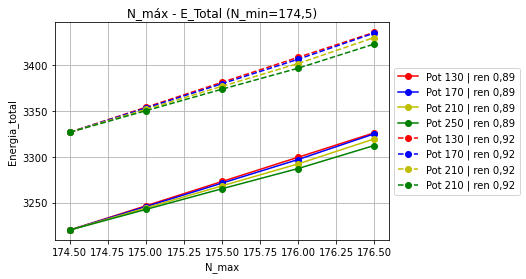

In [38]:
vars = {
    'var':[
        var_pot_130_ren_089_nmin_1745,
        var_pot_170_ren_089_nmin_1745,
        var_pot_210_ren_089_nmin_1745,
        var_pot_250_ren_089_nmin_1745,

        var_pot_130_ren_092_nmin_1745,
        var_pot_170_ren_092_nmin_1745,
        var_pot_210_ren_092_nmin_1745,
        var_pot_250_ren_092_nmin_1745
        ],
    'legends':[
        'Pot 130 | ren 0,89',
        'Pot 170 | ren 0,89',
        'Pot 210 | ren 0,89',
        'Pot 250 | ren 0,89',

        'Pot 130 | ren 0,92',
        'Pot 170 | ren 0,92',
        'Pot 210 | ren 0,92',
        'Pot 210 | ren 0,92'
        ],
    'line':['ro-', 'bo-', 'yo-', 'go-','ro--', 'bo--', 'yo--', 'go--'],
    'x_name':'N_max',
    'y_name':'Energia_total',
    'title':'N_máx - E_Total (N_min=174,5)'
}
create_plot(vars)

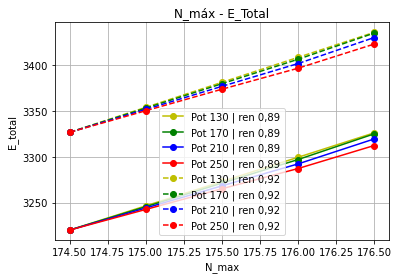

In [20]:
#fig, axes = plt.subplots(nrows=1, ncols=4)
plt.plot(var_pot_130_ren_089_nmin_1745['N_max'], var_pot_130_ren_089_nmin_1745['Energia_total'],'yo-', label='Pot 130 | ren 0,89')
plt.plot(var_pot_170_ren_089_nmin_1745['N_max'], var_pot_170_ren_089_nmin_1745['Energia_total'],'go-', label='Pot 170 | ren 0,89')
plt.plot(var_pot_210_ren_089_nmin_1745['N_max'], var_pot_210_ren_089_nmin_1745['Energia_total'],'bo-', label='Pot 210 | ren 0,89')
plt.plot(var_pot_250_ren_089_nmin_1745['N_max'], var_pot_250_ren_089_nmin_1745['Energia_total'],'ro-', label='Pot 250 | ren 0,89')

plt.plot(var_pot_130_ren_092_nmin_1745['N_max'], var_pot_130_ren_092_nmin_1745['Energia_total'],'yo--', label='Pot 130 | ren 0,92')
plt.plot(var_pot_170_ren_092_nmin_1745['N_max'], var_pot_170_ren_092_nmin_1745['Energia_total'],'go--', label='Pot 170 | ren 0,92')
plt.plot(var_pot_210_ren_092_nmin_1745['N_max'], var_pot_210_ren_092_nmin_1745['Energia_total'],'bo--', label='Pot 210 | ren 0,92')
plt.plot(var_pot_250_ren_092_nmin_1745['N_max'], var_pot_250_ren_092_nmin_1745['Energia_total'],'ro--', label='Pot 250 | ren 0,92')

plt.title('N_máx - E_Total')
plt.grid()
plt.xlabel('N_max')
plt.ylabel('E_total')
plt.legend()

plt.show()


In [13]:
var_ren_089 = df[ren_089 & pot_170 & nmin_1745]
var_ren_090 = df[ren_090 & pot_170 & nmin_1745]
var_ren_091 = df[ren_091 & pot_170 & nmin_1745]
var_ren_092 = df[ren_092 & pot_170 & nmin_1745]

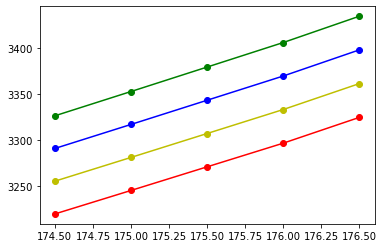

In [14]:
plt.plot(var_ren_089['N_max'], var_ren_089['Energia_total'],'ro-')
plt.plot(var_ren_090['N_max'], var_ren_090['Energia_total'],'yo-')
plt.plot(var_ren_091['N_max'], var_ren_091['Energia_total'],'bo-')
plt.plot(var_ren_092['N_max'], var_ren_092['Energia_total'],'go-')
plt.show()

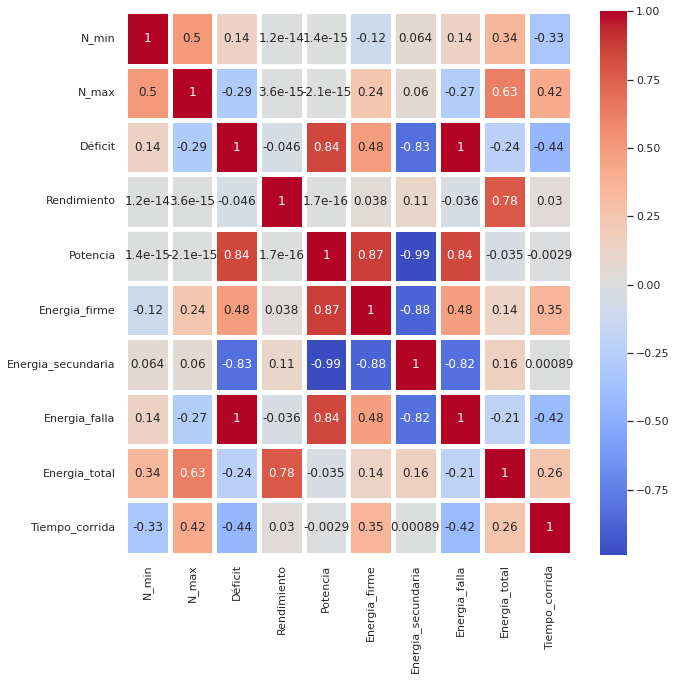

In [43]:
plt.figure(figsize=(10,10))
sns.set(style='whitegrid', palette='muted', font_scale=1)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=5)
plt.show()

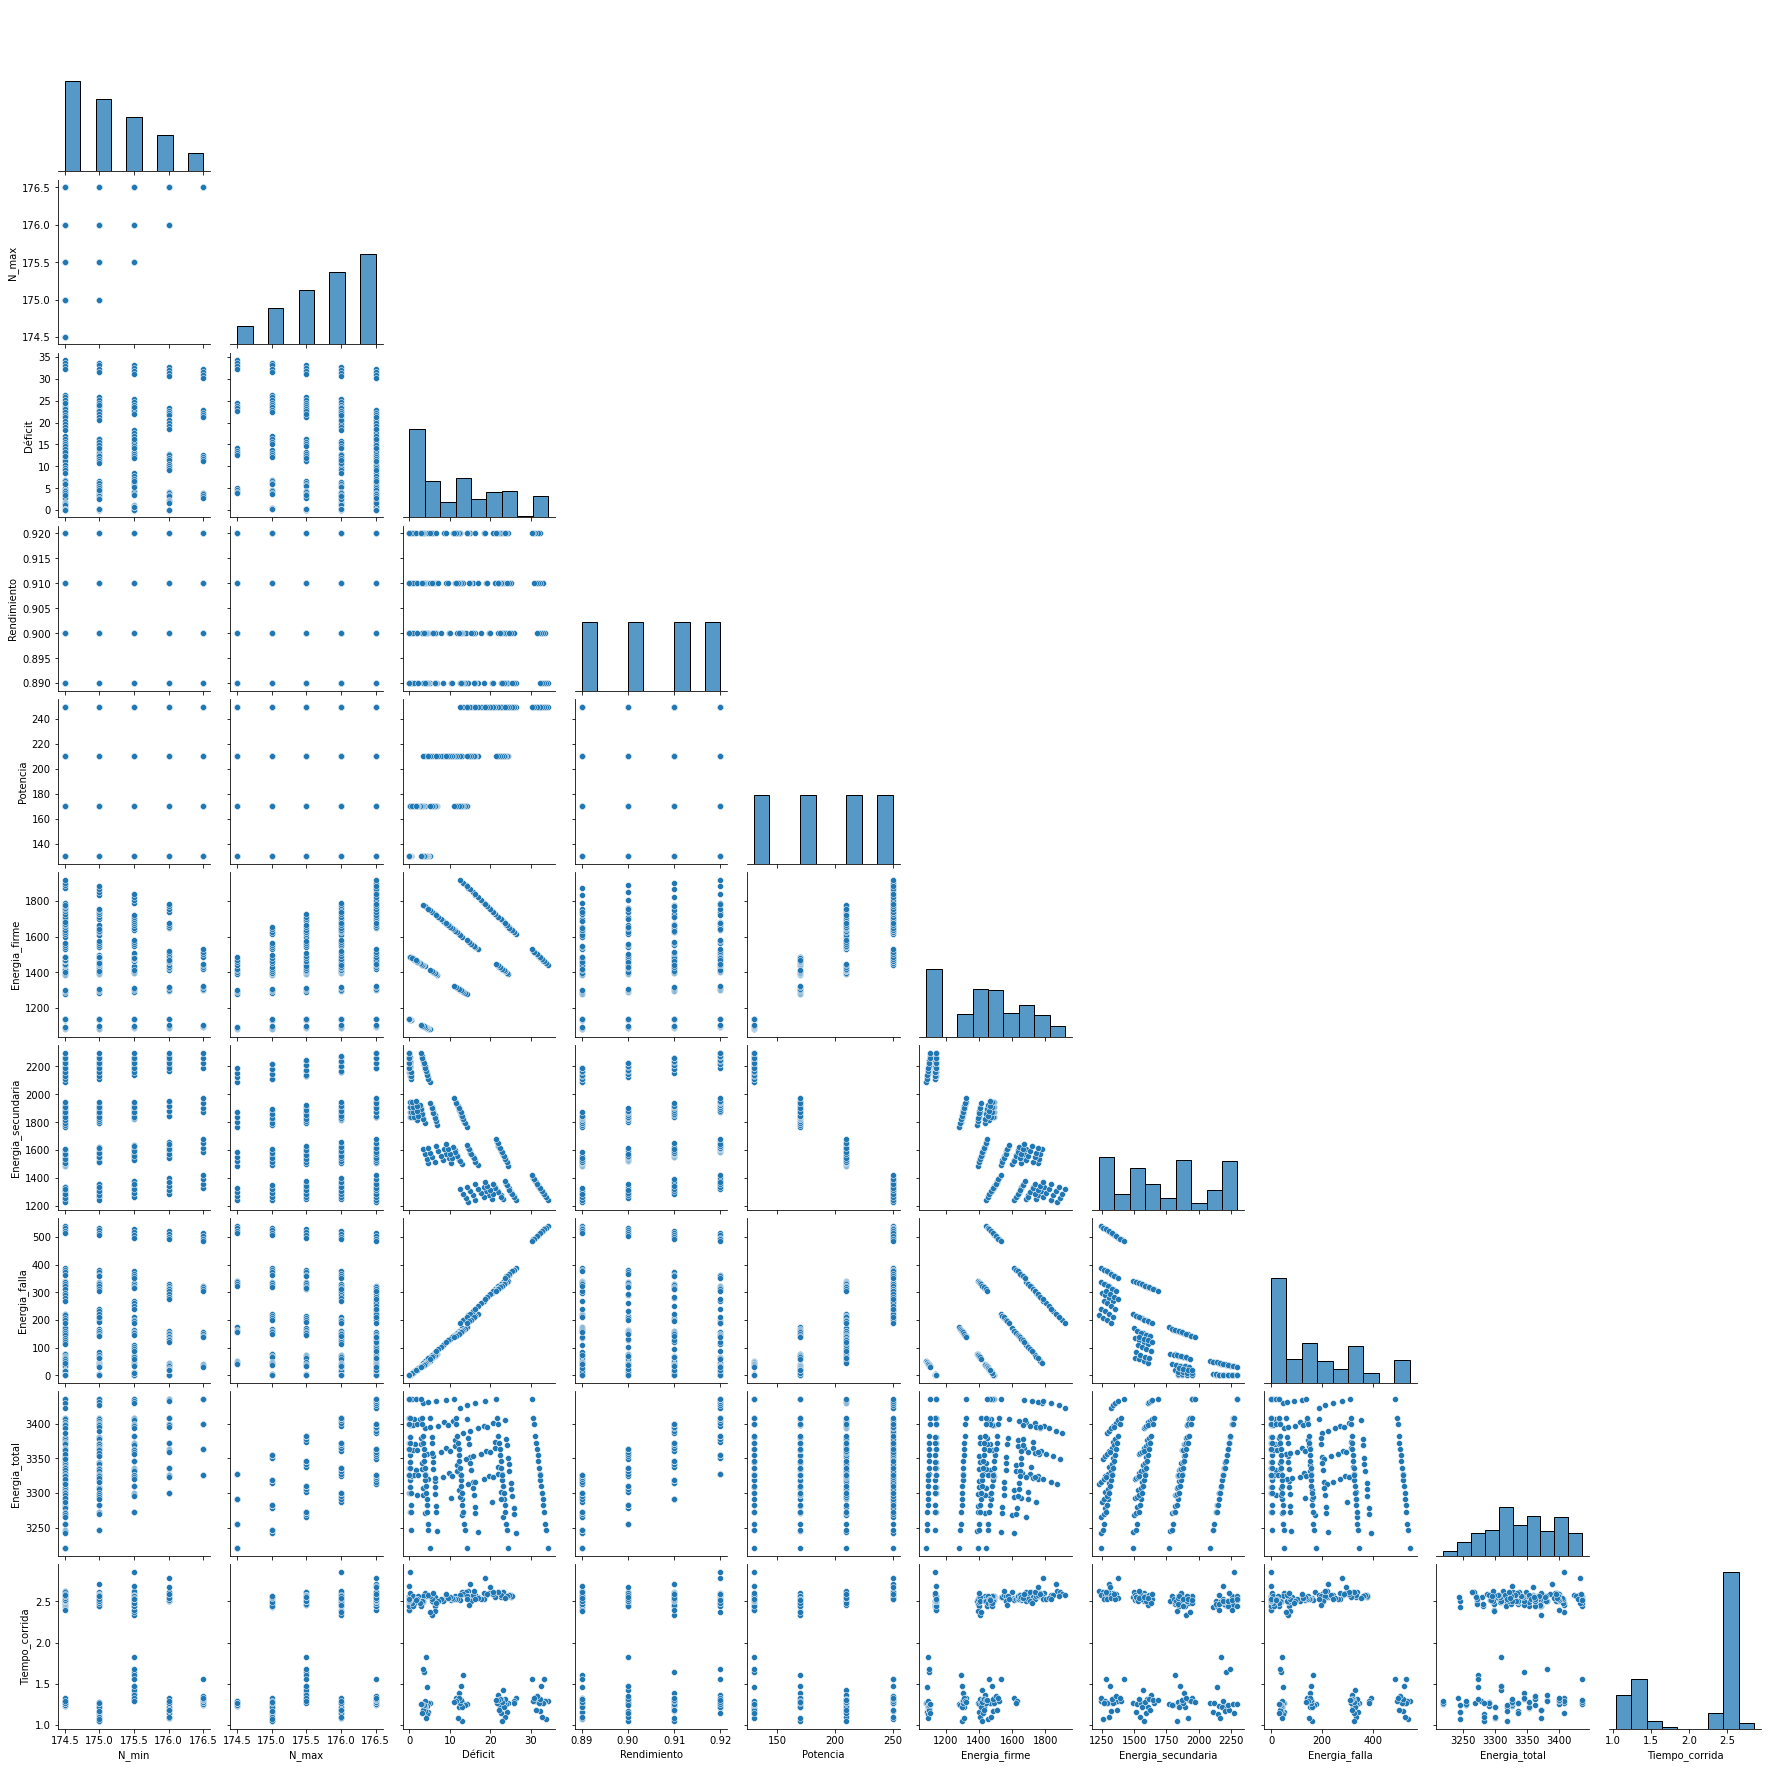

In [10]:
sns.pairplot(data=df, corner=True)
plt.show()

In [11]:
df.head(2)

,N_min,N_max,Déficit,Rendimiento,Potencia,Energia_firme,Energia_secundaria,Energia_falla,Energia_total,Tiempo_corrida
0,174.5,174.5,4.98,0.89,130,1082.111,2086.397,51.617,3220.125,1.26
1,174.5,174.5,4.60,0.90,130,1086.395,2121.444,47.890,3255.729,1.26


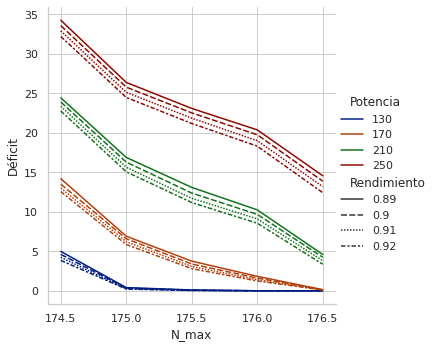

In [51]:
nmin_1745 = df[df['N_min'] == 174.5]
sns.relplot(data=nmin_1745, x='N_max', y='Déficit', hue='Potencia', style='Rendimiento', kind='line',palette='dark')
plt.show()

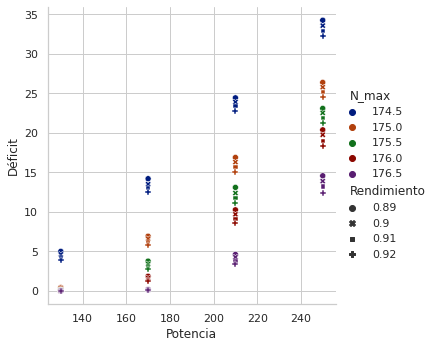

In [50]:
sns.relplot(data=nmin_1745, x='Potencia', y='Déficit', hue='N_max', style='Rendimiento', kind='scatter',palette='dark')
plt.show()

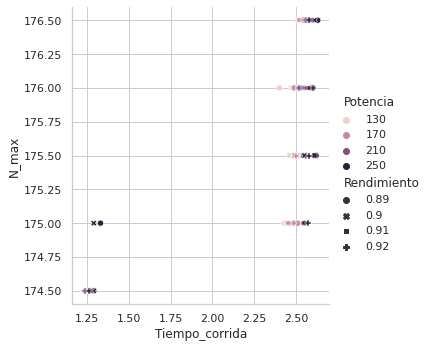

In [46]:
sns.relplot(data=nmin_1745, x='Tiempo_corrida', y='N_max', hue='Potencia', style='Rendimiento', kind='scatter')
plt.show()

<Figure size 720x720 with 0 Axes>

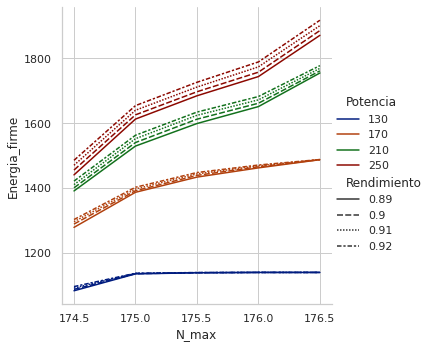

In [53]:
plt.figure(figsize=(10,10))
sns.relplot(data=nmin_1745, x='N_max', y='Energia_firme', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
plt.show()

<Figure size 720x720 with 0 Axes>

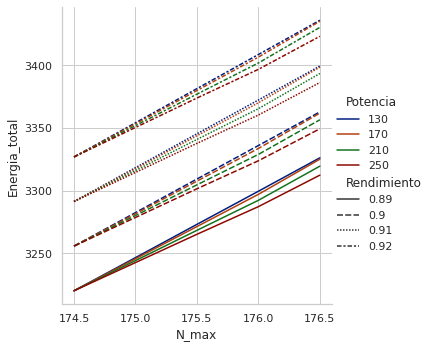

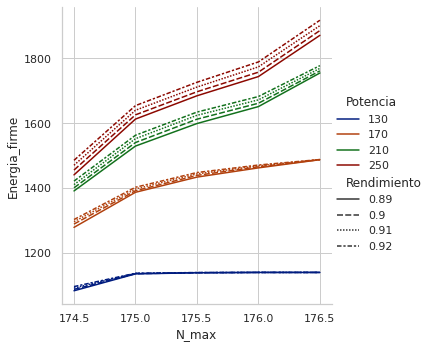

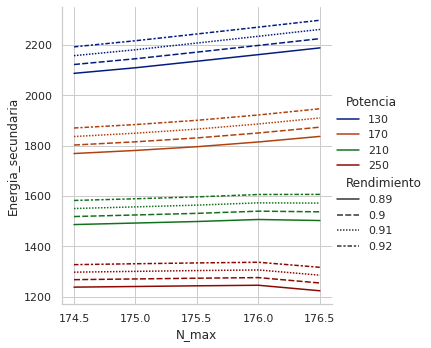

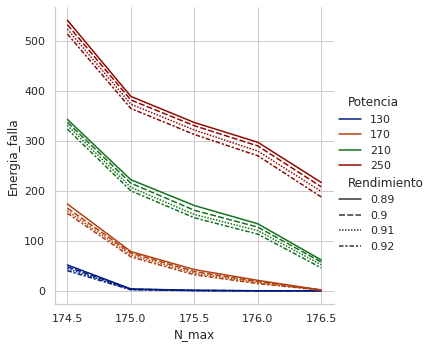

In [56]:
plt.figure(figsize=(10,10))
sns.relplot(data=nmin_1745, x='N_max', y='Energia_total', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmin_1745, x='N_max', y='Energia_firme', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmin_1745, x='N_max', y='Energia_secundaria', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmin_1745, x='N_max', y='Energia_falla', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
plt.show()

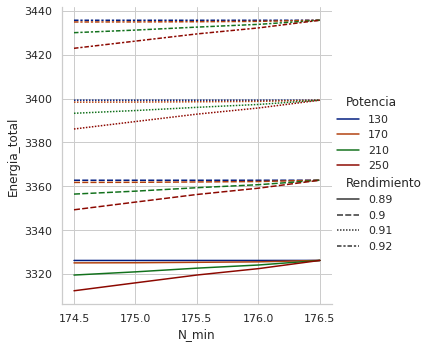

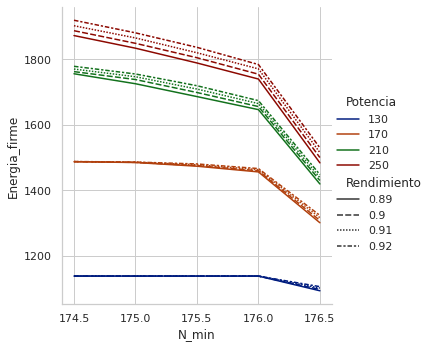

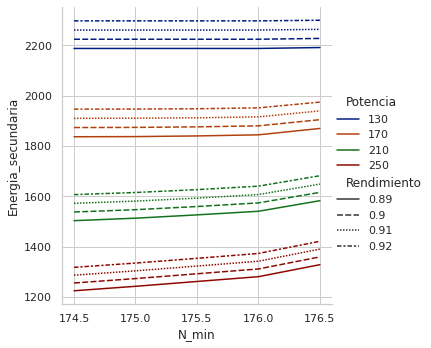

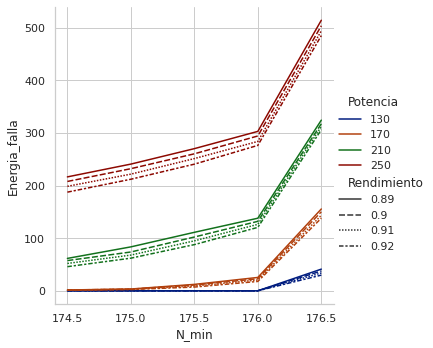

In [64]:
nmax_1765 = df[df['N_max']==176.5]
sns.relplot(data=nmax_1765, x='N_min', y='Energia_total', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmax_1765, x='N_min', y='Energia_firme', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmax_1765, x='N_min', y='Energia_secundaria', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
sns.relplot(data=nmax_1765, x='N_min', y='Energia_falla', hue='Potencia', style='Rendimiento',palette='dark', kind='line')
